## Pandas怎样实现groupby分组统计

In [2]:
import pandas as pd
import numpy as np
# 加上这一句，能在jupyter notebook展示matplot图
%matplotlib inline

In [3]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.719374,0.181945
1,bar,one,1.878739,-1.126452
2,foo,two,-0.044554,-0.103829
3,bar,three,-0.569220,-0.198655
4,foo,two,-0.642564,-0.185002
5,bar,two,-0.268785,-0.441082
6,foo,one,0.783708,-0.540208
7,foo,three,-1.764951,1.434953


### 一、分组使用聚合函数做数据统计

#### 1、单个列groupby，查询所有数据列的统计

In [3]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.142940,0.436595
foo,-2.617633,1.083423


#### 2、多个列groupby，查询所有数据列的统计

In [4]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    1.878739 -1.126452
    three -0.569220 -0.198655
    two   -0.268785 -0.441082
foo one    0.751541 -0.179131
    three -1.764951  1.434953
    two   -0.343559 -0.144415

In [5]:
df.groupby(['A','B'], as_index=False).mean()

,A,B,C,D
0,bar,one,1.878739,-1.126452
1,bar,three,-0.569220,-0.198655
2,bar,two,-0.268785,-0.441082
3,foo,one,0.751541,-0.179131
4,foo,three,-1.764951,1.434953
5,foo,two,-0.343559,-0.144415


#### 3、同时查看多种数据统计

In [6]:
df.groupby('A').agg([np.sum, np.mean, np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  1.040734  0.346911  1.335080 -1.766189 -0.588730  0.481198
foo -0.948986 -0.189797  1.058478  0.787859  0.157572  0.759091

#### 4、查看单列的结果数据统计

In [7]:
# 方法1：预过滤，性能更好
df.groupby('A')['C'].agg([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
bar,1.040734,0.346911,1.335080
foo,-0.948986,-0.189797,1.058478


In [8]:
# 方法2
df.groupby('A').agg([np.sum, np.mean, np.std])['C']

,sum,mean,std
A,,,
bar,1.040734,0.346911,1.335080
foo,-0.948986,-0.189797,1.058478


#### 5、不同列使用不同的聚合函数

In [9]:
df.groupby('A').agg({'C':np.sum, 'D':np.mean})

,C,D
A,,
bar,1.040734,-0.588730
foo,-0.948986,0.157572


### 二、遍历groupby的结果理解执行流程

##### 1、遍历单个列聚合的分组

In [11]:
g = df.groupby('A')
g

In [14]:
for name,group in g:
    print(name)
    print(group)
    print()

bar
     A      B         C         D
1  bar    one  1.878739 -1.126452
3  bar  three -0.569220 -0.198655
5  bar    two -0.268785 -0.441082

foo
     A      B         C         D
0  foo    one  0.719374  0.181945
2  foo    two -0.044554 -0.103829
4  foo    two -0.642564 -0.185002
6  foo    one  0.783708 -0.540208
7  foo  three -1.764951  1.434953



***可以获取单个分组的数据***

In [15]:
g.get_group('bar')

,A,B,C,D
1,bar,one,1.878739,-1.126452
3,bar,three,-0.569220,-0.198655
5,bar,two,-0.268785,-0.441082


##### 2、遍历多个列聚合的分组

In [16]:
g = df.groupby(['A', 'B'])

In [17]:
for name,group in g:
    print(name)
    print(group)
    print()

('bar', 'one')
     A    B         C         D
1  bar  one  1.878739 -1.126452

('bar', 'three')
     A      B        C         D
3  bar  three -0.56922 -0.198655

('bar', 'two')
     A    B         C         D
5  bar  two -0.268785 -0.441082

('foo', 'one')
     A    B         C         D
0  foo  one  0.719374  0.181945
6  foo  one  0.783708 -0.540208

('foo', 'three')
     A      B         C         D
7  foo  three -1.764951  1.434953

('foo', 'two')
     A    B         C         D
2  foo  two -0.044554 -0.103829
4  foo  two -0.642564 -0.185002



In [15]:
g.get_group(('foo', 'one'))

,A,B,C,D
0,foo,one,0.542903,0.788896
6,foo,one,-0.665189,-1.505290


***可以直接查询group后的某几列，生成Series或者子DataFrame***

In [16]:
g['C']

In [17]:
for name, group in g['C']:
    print(name)
    print(group)
    print(type(group))
    print()

('bar', 'one')
1   -0.375789
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('bar', 'three')
3   -1.564748
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('bar', 'two')
5   -0.202403
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('foo', 'one')
0    0.542903
6   -0.665189
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('foo', 'three')
7   -0.498339
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('foo', 'two')
2   -0.903407
4   -1.093602
Name: C, dtype: float64
<class 'pandas.core.series.Series'>



### 三、实例分组探索天气数据

In [18]:
fpath = "E:/code/data_analysis/pandas_data_analysis/data/4_beijing_tianqi_2018.csv"
df = pd.read_csv(fpath)
# 替换掉温度的后缀℃
df["bWendu"] = df["bWendu"].str.replace("℃", "").astype('int32')
df["yWendu"] = df["yWendu"].str.replace("℃", "").astype('int32')
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


In [19]:
# 新增一列为月份
df['month'] = df['ymd'].str[:7]
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,month
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,2018-01
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,2018-01
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,2018-01
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,2018-01
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,2018-01


#### 1、查看每个月的最高温度

In [20]:
data = df.groupby('month')['bWendu'].max()
data

month
2018-01     7
2018-02    12
2018-03    27
2018-04    30
2018-05    35
2018-06    38
2018-07    37
2018-08    36
2018-09    31
2018-10    25
2018-11    18
2018-12    10
Name: bWendu, dtype: int32

In [21]:
type(data)

pandas.core.series.Series

c:\users\sunny\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='month'>

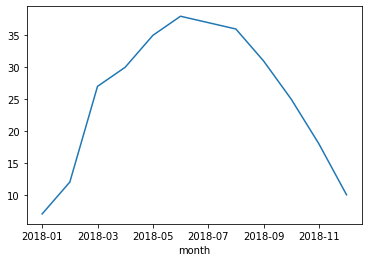

In [22]:
data.plot()

#### 2、查看每个月的最高温度、最低温度、平均空气质量指数

In [23]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,month
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,2018-01
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,2018-01
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,2018-01
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,2018-01
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,2018-01


In [24]:
group_data = df.groupby('month').agg({"bWendu":np.max, "yWendu":np.min, "aqi":np.mean})
group_data

,bWendu,yWendu,aqi
month,,,
2018-01,7,-12,60.677419
2018-02,12,-10,78.857143
2018-03,27,-4,130.322581
2018-04,30,1,102.866667
2018-05,35,10,99.064516
2018-06,38,17,82.300000
2018-07,37,22,72.677419
2018-08,36,20,59.516129
2018-09,31,11,50.433333


c:\users\sunny\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='month'>

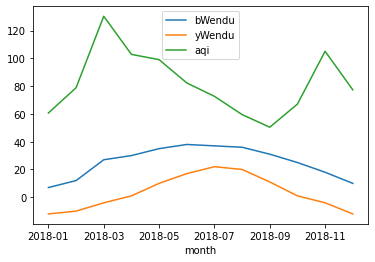

In [25]:
group_data.plot()